# Introduction: Root Locus Controller Design

In this tutorial we will introduce the root locus, show how to create it using Python, and demonstrate how to design feedback controllers using the root locus that satisfy certain performance criteria.

## Closed-Loop Poles

The root locus of an (open-loop) transfer function \\(H(s)\\) is a plot of the locations (locus) of all possible closed-loop poles with proportional gain ```K``` and unity feedback.

![RootLocusTutorial_ClosedLoopPoles_BlockDiagram.png](figures/feedback_rlocus.png)

The closed-loop transfer function is:
$$
\frac{Y(s)}{R(s)} = \frac{KH(s)}{1 + KH(s)}
$$
and thus the poles of the closed-loop poles of the closed-loop system are values of \\(s\\) such that $1 + KH(s) = 0$. If we write $H(s) = b(s)/a(s)$, then this equation has the form:

$$
a(s) + Kb(s) = 0
$$

$$
\frac{a(s)}{K} + b(s) = 0
$$

Let \\(n\\) = order of \\(a(s)\\) and \\(m\\) = order of \\(b(s)\\) (the order of a polynomial is the highest power of \\(s\\) that appears in it).

We will consider all positive values of ```K```.  In the limit as $K \rightarrow 0$, the poles of the closed-loop system are \\(a(s) = 0\\) or the poles of $H(s)$.  In the limit as $K \rightarrow \infty$, the poles of the closed-loop system are \\(b(s) = 0\\) or the zeros of $H(s)$. No matter what we pick ```K``` to be, **the closed-loop system must always have \\(n\\) poles**, where \\(n\\) is the number of poles of $H(s)$.  **The root locus must have \\(n\\) branches**, each branch starts at a pole of \\(H(s)\\) and goes to a zero of $H(s)$.

If \\(H(s)\\) has more poles than zeros (as is often the case), \\(m < n\\) and we say that \\(H(s)\\) has **zeros at infinity**. In this case, the limit of \\(H(s)\\) as \\(s \rightarrow \infty\\) is zero.  The number of zeros at infinity is $n-m$, the number of poles minus the number of zeros, and is the number of branches of the root locus that go to infinity (asymptotes).

Since the root locus is actually the locations of all possible closed-loop poles, from the root locus we can select a gain such that our closed-loop system will perform the way we want.  If any of the selected poles are on the right half plane, the closed-loop system will be unstable.  The poles that are closest to the imaginary axis have the greatest influence on the closed-loop response, so even though the system has three or four poles, it may still act like a second or even first order system depending on the location(s) of the dominant pole(s).

## Plotting the Root Locus of a Transfer Function

Consider an open-loop system which has a transfer function of:

$$
H(s) = \frac{Y(s)}{U(s)} = \frac{s + 7}{s(s + 5)(s + 15)(s + 20)}
$$

How do we design a feedback controller for the system by using the root locus method?  Say our design criteria are 5% overshoot and 1 second rise time.

In [1]:
import control
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Generate Larger more readable plots
sns.set(
    rc={
        "axes.labelsize": 8,
        "axes.titlesize": 8,
        "figure.figsize": (4 * 1.618, 4),  # Golden ratio
        "figure.dpi": 72,
    }
)

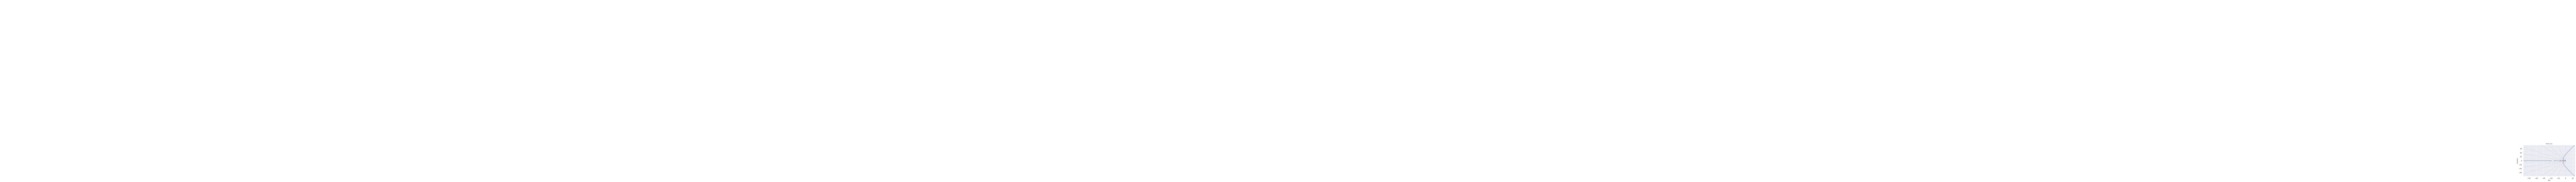

In [3]:
s = control.TransferFunction.s
sys = (s + 7) / (s * (s + 5) * (s + 15) * (s + 20))

rlist, klist = control.rlocus(sys, plot=True, grid="on")

## Closed-Loop Response

In order to find the step response, you need to know the closed-loop transfer function.  You could compute this using the rules of block diagrams, or let MATLAB do it for you (there is no need to enter a value for |K| if the |rlocfind| command was used):

In [4]:
K = 350
sys_cl = control.feedback(K * sys, 1)

The two arguments to the function |feedback| are the numerator and denominator of the open-loop system.  You need to include the proportional gain that you have chosen.  Unity feedback is assumed. If you have a non-unity feedback situation, look at the help file for the MATLAB function |feedback|, which can find the closed-loop transfer function with a gain in the feedback loop. Check out the step response of your closed-loop system:

In [5]:
# step(sys_cl)

As we expected, this response has an overshoot less than 5% and a rise time less than 1 second.